# Loading All Datasets

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Date and time handling
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customers.csv to customers.csv
Saving order_items.csv to order_items.csv
Saving orders.csv to orders.csv
Saving payments.csv to payments.csv
Saving products.csv to products.csv
Saving sellers.csv to sellers.csv


In [ ]:
# Example: Loading each dataset
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
payments = pd.read_csv('payments.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv', encoding='latin1')

# Checking DataTypes and customizing

In [ ]:
#print(customers.info())
#print(orders.info())      #some columns must be in datetime format of date and time both
#print(order_items.info())   #one column for datetime
#print(payments.info())
#print(products.info())
#print(sellers.info())
#print(geolocation.info())

In [ ]:
# from orders.csv table changing columns which need to be in datetime

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [ ]:
# from order_items.csv table

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# Basic Problems

**1. List all unique cities where customers are located.**

In [ ]:
# List all unique cities where customers are located
unique_cities = customers['customer_city'].unique()

# Convert to a sorted list for better readability
unique_cities = sorted(unique_cities)

# Display the result
print(f"Total Unique Cities: {len(unique_cities)}")
print("List of Unique Cities:")
print(unique_cities)

Total Unique Cities: 4119
List of Unique Cities:
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrestina', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formosas', 'aguas frias', 'aguas lindas de goias', 'aguas mornas', 'aguas vermelhas', 'agudo', 'agudos', 'aguia branca', 'aimores', 'aiuaba', 'aiuruoca', 'ajapi', 'ajuricaba', 'alagoa', 

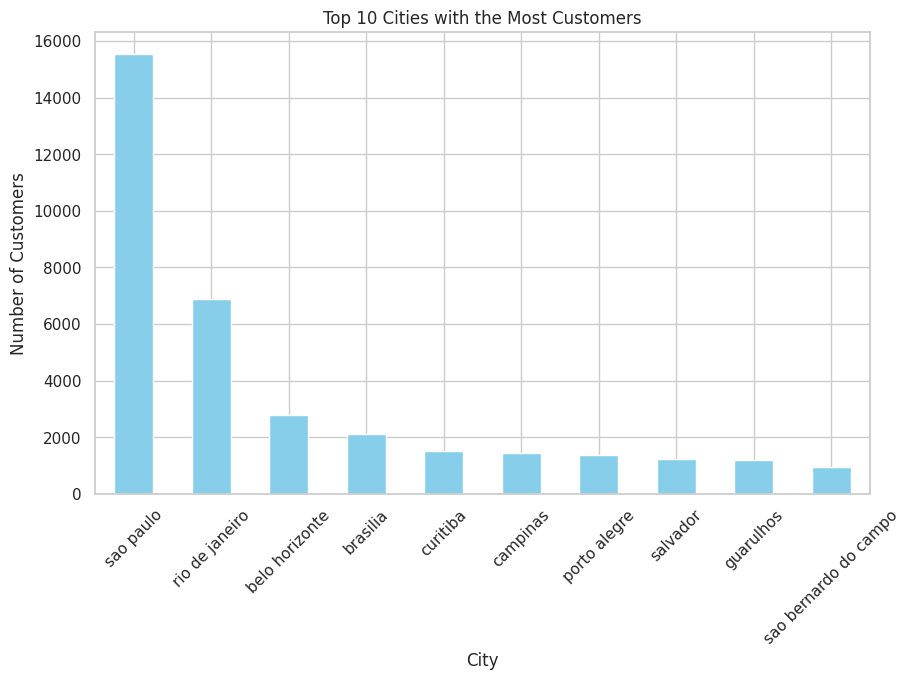

In [ ]:
# top 10 cities with most customers

# Count customers per city
city_counts = customers['customer_city'].value_counts().head(10)  # Top 10 cities

# Plot
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities with the Most Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


**2. count the number of orders placed in 2017**

In [ ]:
# Filter orders placed in 2017
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]

# Count the number of orders in 2017
num_orders_2017 = orders_2017.shape[0]

# Display the result
print(f"Number of orders placed in 2017: {num_orders_2017}")

Number of orders placed in 2017: 45101


<ipython-input-13-8c9e1eaf275c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017['month'] = orders_2017['order_purchase_timestamp'].dt.month


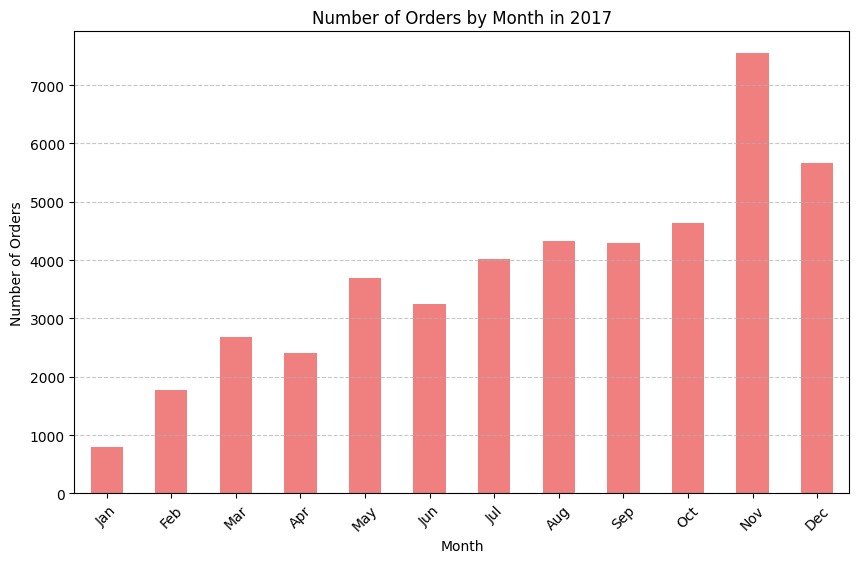

In [ ]:
# Extract month from 'order_purchase_timestamp'
orders_2017['month'] = orders_2017['order_purchase_timestamp'].dt.month

# Count orders per month
monthly_orders = orders_2017['month'].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='bar', color='lightcoral')
plt.title("Number of Orders by Month in 2017")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3. Find the total sales per category**

In [ ]:
# Merge order_items with products on 'product_id'
merged_data = pd.merge(order_items, products, on='product_id')

# Group by product category and calculate total sales
total_sales_per_category = merged_data.groupby('product category')['price'].sum().sort_values(ascending=False)

# Convert to DataFrame for better readability
total_sales_per_category = total_sales_per_category.reset_index()
total_sales_per_category.columns = ['Product Category', 'Total Sales']

# Display the result
print(total_sales_per_category)


               Product Category  Total Sales
0                 HEALTH BEAUTY   1258681.34
1               Watches present   1205005.68
2                bed table bath   1036988.68
3                 sport leisure    988048.97
4          computer accessories    911954.32
..                          ...          ...
68                      flowers      1110.04
69              House Comfort 2       760.27
70               cds music dvds       730.00
71  Fashion Children's Clothing       569.85
72       insurance and services       283.29

[73 rows x 2 columns]


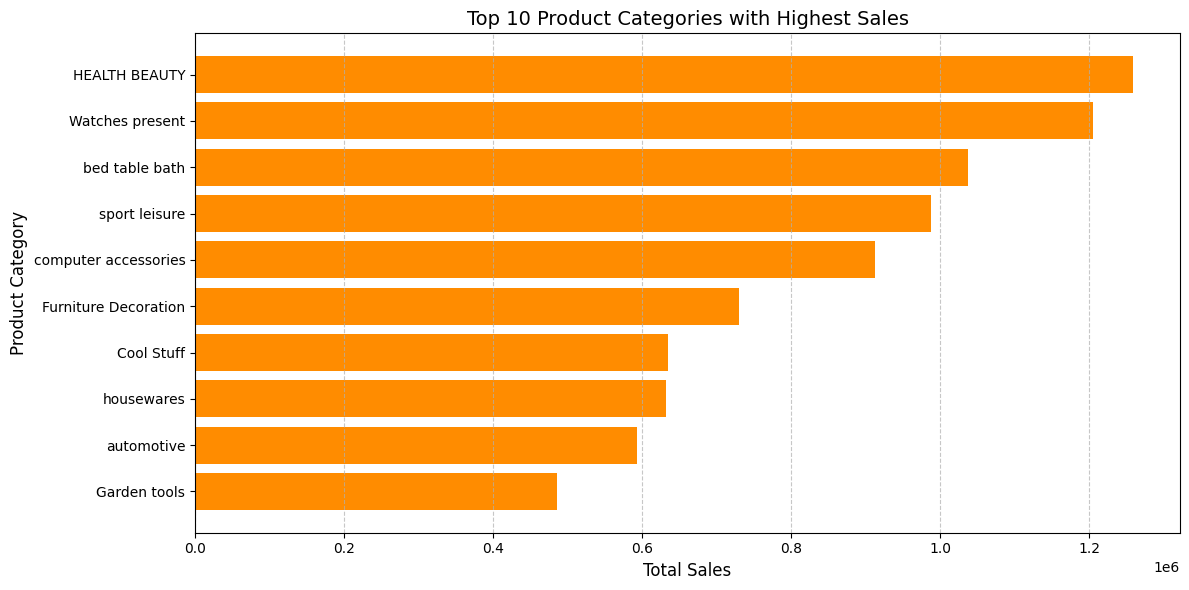

In [ ]:
# Get the top 10 product categories by total sales
top_10_categories = total_sales_per_category.head(10)

# Horizontal bar chart for better readability
plt.figure(figsize=(12, 6))
plt.barh(top_10_categories['Product Category'], top_10_categories['Total Sales'], color='darkorange')
plt.title("Top 10 Product Categories with Highest Sales", fontsize=14)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have highest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**4. Calculate the percentage of orders that were paid in installments.**

In [ ]:
# Filter orders paid in installments
installments_orders = payments[payments['payment_installments'] > 1]

# Count total orders and installment orders
total_orders = payments['order_id'].nunique()
installment_orders_count = installments_orders['order_id'].nunique()

# Calculate the percentage
percentage_installments = (installment_orders_count / total_orders) * 100

# Display the result
print(f"Percentage of orders paid in installments: {percentage_installments:.2f}%")


Percentage of orders paid in installments: 51.46%


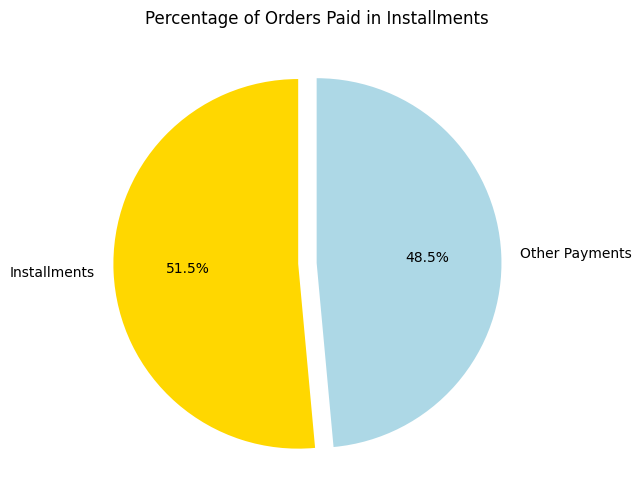

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Installments', 'Other Payments']
sizes = [installment_orders_count, total_orders - installment_orders_count]
colors = ['gold', 'lightblue']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0))
plt.title("Percentage of Orders Paid in Installments")
plt.show()


**5. Count the number of customers from each state.**

In [ ]:
# Count the number of customers from each state
customers_per_state = customers['customer_state'].value_counts()

# Convert to DataFrame for better readability
customers_per_state = customers_per_state.reset_index()
customers_per_state.columns = ['State', 'Number of Customers']

# Display the result
print(customers_per_state)


   State  Number of Customers
0     SP                41746
1     RJ                12852
2     MG                11635
3     RS                 5466
4     PR                 5045
5     SC                 3637
6     BA                 3380
7     DF                 2140
8     ES                 2033
9     GO                 2020
10    PE                 1652
11    CE                 1336
12    PA                  975
13    MT                  907
14    MA                  747
15    MS                  715
16    PB                  536
17    PI                  495
18    RN                  485
19    AL                  413
20    SE                  350
21    TO                  280
22    RO                  253
23    AM                  148
24    AC                   81
25    AP                   68
26    RR                   46


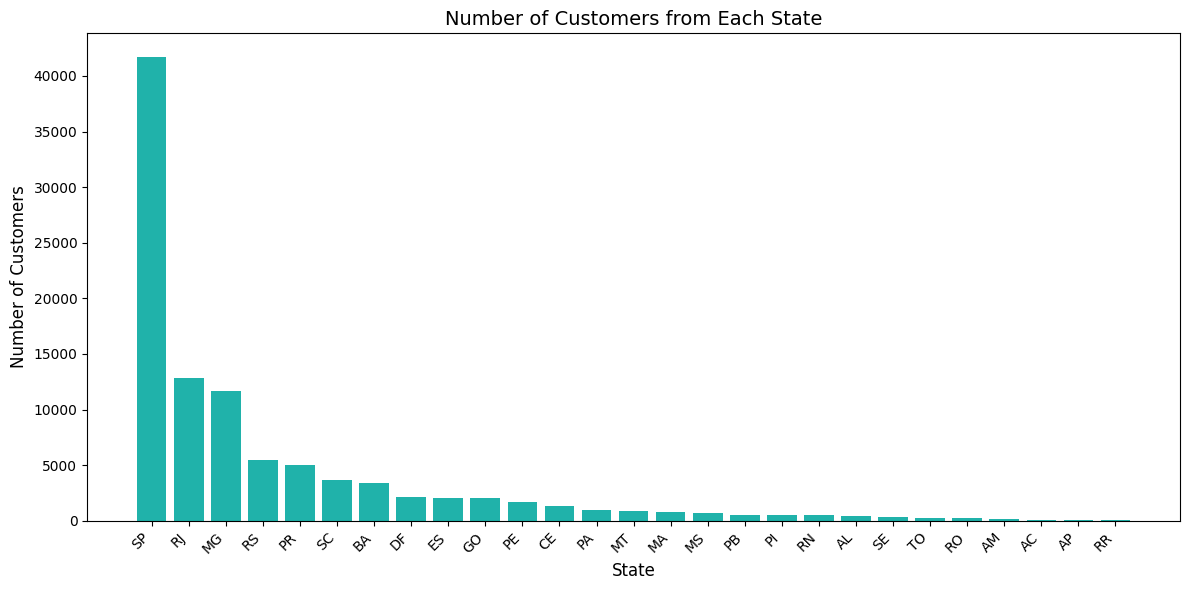

In [ ]:
# Plot the number of customers per state
plt.figure(figsize=(12, 6))
plt.bar(customers_per_state['State'], customers_per_state['Number of Customers'], color='lightseagreen')
plt.title("Number of Customers from Each State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Intermediate Problems

**1. Calculate the number of orders per month in 2018.**

In [ ]:
# Filter orders placed in 2018
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]

# Extract month and map it to month name (abbreviated)
orders_2018['month_name'] = orders_2018['order_purchase_timestamp'].dt.strftime('%b')

# Count the number of orders per month
orders_per_month_2018 = orders_2018['month_name'].value_counts()

# Define the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the counts to match the month order
orders_per_month_2018 = orders_per_month_2018.reindex(month_order)

# Display the result
print("Number of orders per month in 2018:")
print(orders_per_month_2018)

Number of orders per month in 2018:
month_name
Jan    7269.0
Feb    6728.0
Mar    7211.0
Apr    6939.0
May    6873.0
Jun    6167.0
Jul    6292.0
Aug    6512.0
Sep      16.0
Oct       4.0
Nov       NaN
Dec       NaN
Name: count, dtype: float64


<ipython-input-23-0d9b7b5ed1a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2018['month_name'] = orders_2018['order_purchase_timestamp'].dt.strftime('%b')


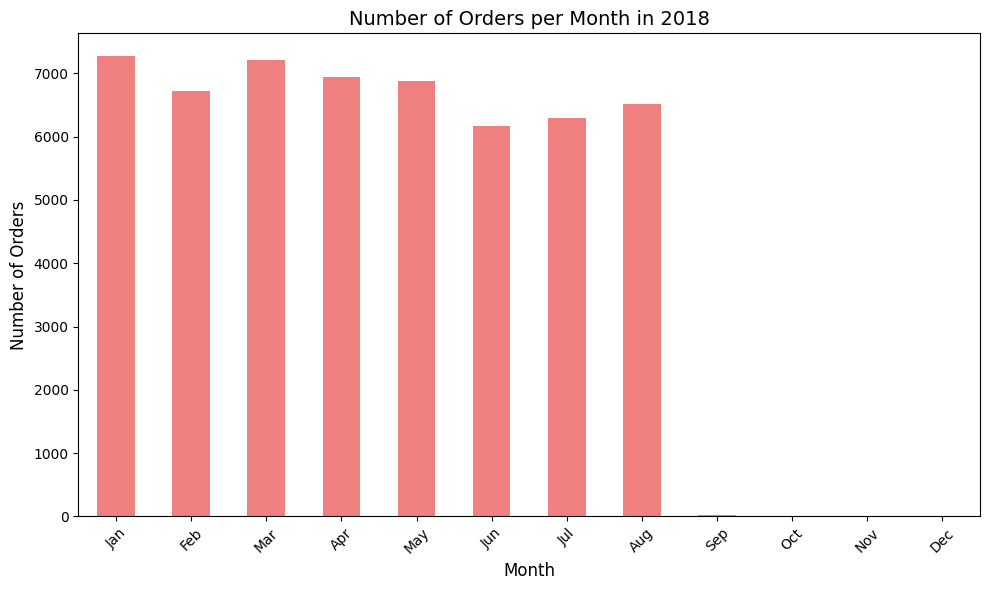

In [ ]:
# Plot the number of orders per month in 2018, sorted from Jan to Dec
plt.figure(figsize=(10, 6))
orders_per_month_2018.plot(kind='bar', color='lightcoral')

plt.title("Number of Orders per Month in 2018", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Find the average number of products per order,grouped by customer city.**

In [ ]:
# Merge orders and customers on 'customer_id' to get customer city
orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')

# Merge the result with order_items on 'order_id' to link orders with their products
merged_data = pd.merge(orders_customers, order_items, on='order_id', how='inner')

# Count the number of products per order
products_per_order = merged_data.groupby(['customer_city', 'order_id']).size().reset_index(name='num_products')

# Calculate the average number of products per order by customer city
avg_products_per_order_by_city = products_per_order.groupby('customer_city')['num_products'].mean().sort_values(ascending=False)

# Display the result
print("Average number of products per order, grouped by customer city:")
print(avg_products_per_order_by_city)


Average number of products per order, grouped by customer city:
customer_city
padre carvalho    7.0
celso ramos       6.5
candido godoi     6.0
datas             6.0
matias olimpio    5.0
                 ... 
indiana           1.0
indianopolis      1.0
indiapora         1.0
indiaroba         1.0
zortea            1.0
Name: num_products, Length: 4110, dtype: float64


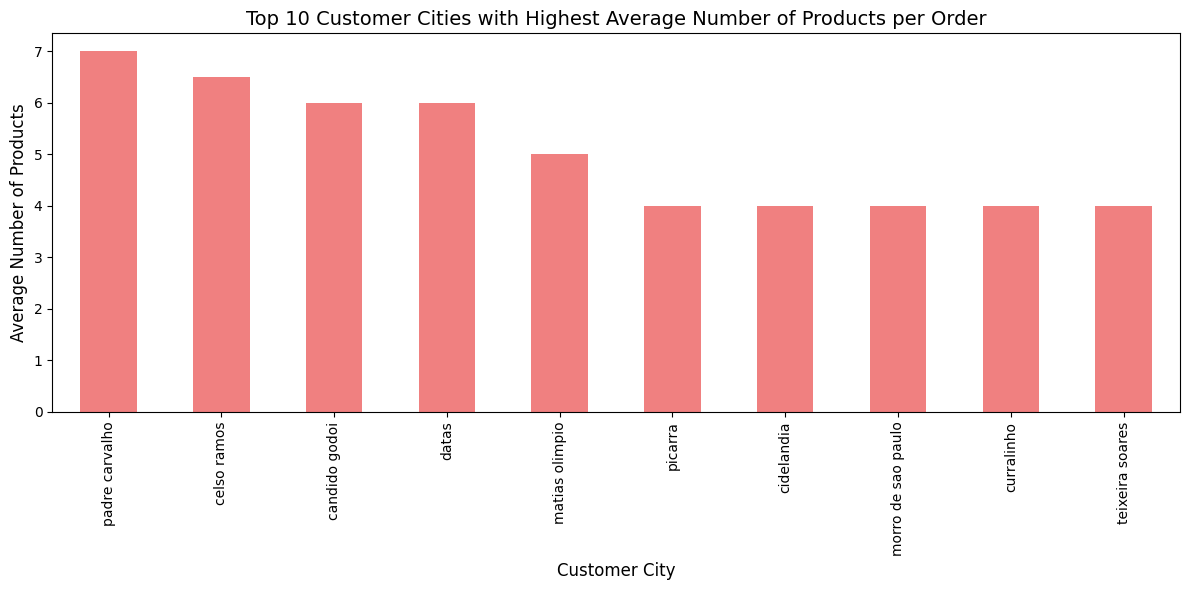

In [ ]:
# Get the top 10 cities with the highest average number of products per order
top_10_avg_products_per_order_by_city = avg_products_per_order_by_city.head(10)

# Plot the top 10 customer cities with the highest average number of products per order
plt.figure(figsize=(12, 6))
top_10_avg_products_per_order_by_city.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Customer Cities with Highest Average Number of Products per Order", fontsize=14)
plt.xlabel("Customer City", fontsize=12)
plt.ylabel("Average Number of Products", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**3. Calculate the percentage of total revenue contributed by each product category.**

In [ ]:
# Merge order_items with products to get the product_category
merged_data = pd.merge(order_items, products, on='product_id', how='inner')

# Merge the result with payments to get the payment value
merged_data = pd.merge(merged_data, payments, on='order_id', how='inner')

# Calculate revenue for each product in an order (price * quantity)
merged_data['revenue'] = merged_data['price'] * merged_data.groupby('order_id')['order_item_id'].transform('count')

# Calculate total revenue
total_revenue = merged_data['revenue'].sum()

# Calculate revenue per product category
revenue_per_category = merged_data.groupby('product category')['revenue'].sum()

# Calculate the percentage of total revenue contributed by each product category
revenue_percentage = (revenue_per_category / total_revenue) * 100

# Sort the result in descending order
revenue_percentage = revenue_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of total revenue contributed by each product category:")
print(revenue_percentage)


Percentage of total revenue contributed by each product category:
product category
bed table bath                 8.601765
HEALTH BEAUTY                  7.692277
computer accessories           7.271088
Watches present                6.969825
sport leisure                  6.414288
                                 ...   
flowers                        0.008445
House Comfort 2                0.004690
cds music dvds                 0.004245
Fashion Children's Clothing    0.003031
insurance and services         0.001321
Name: revenue, Length: 73, dtype: float64


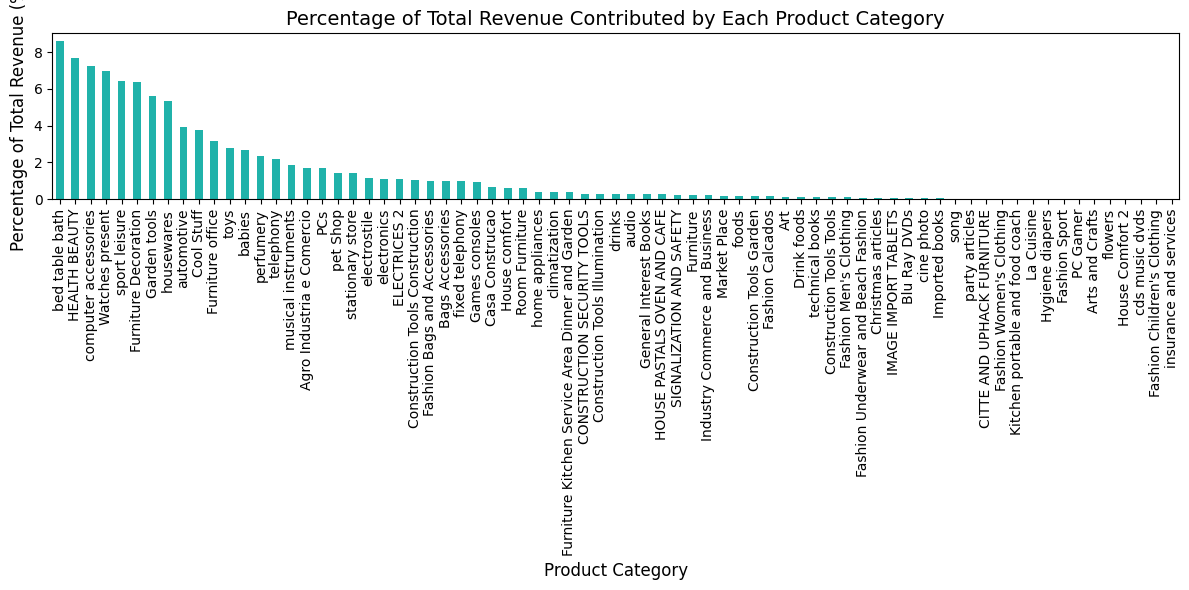

In [ ]:
# Plot the percentage of total revenue contributed by each product category
plt.figure(figsize=(12, 6))
revenue_percentage.plot(kind='bar', color='lightseagreen')
plt.title("Percentage of Total Revenue Contributed by Each Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Percentage of Total Revenue (%)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**4. Identify the correlation between product price and the number of times a product has been purchased.**

In [ ]:
# Count the number of times each product has been purchased in order_items table
product_purchase_count = order_items.groupby('product_id').size().reset_index(name='num_purchases')

# Get the price for each product from order_items (using drop_duplicates to avoid multiple entries)
product_price = order_items[['product_id', 'price']].drop_duplicates()

# Merge the product purchase count with the price for each product
merged_data = pd.merge(product_purchase_count, product_price, on='product_id', how='left')

# Calculate the correlation between product price and the number of times a product has been purchased
correlation = merged_data[['price', 'num_purchases']].corr()

# Display the correlation matrix
print("Correlation between product price and the number of times a product has been purchased:")
print(correlation)


Correlation between product price and the number of times a product has been purchased:
                  price  num_purchases
price          1.000000      -0.023458
num_purchases -0.023458       1.000000


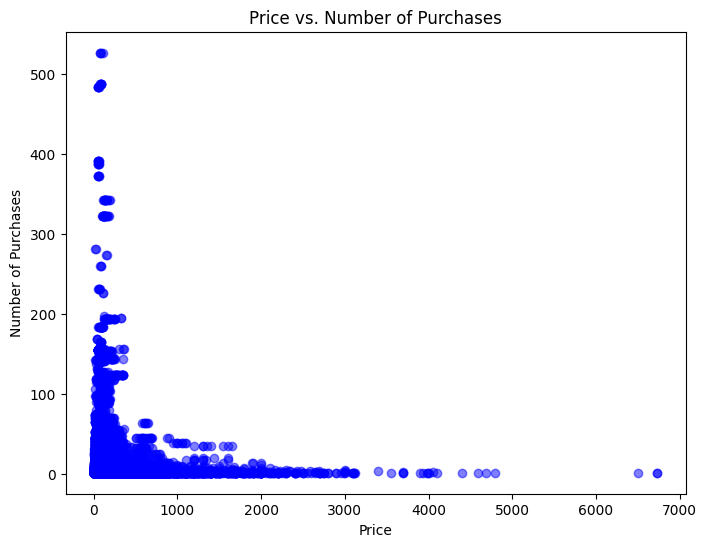

In [ ]:
# Scatter plot to visualize the relationship between price and number of purchases
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['price'], merged_data['num_purchases'], alpha=0.5, color='b')
plt.title('Price vs. Number of Purchases')
plt.xlabel('Price')
plt.ylabel('Number of Purchases')
plt.show()

**5. Calculate the total revenue generated by each seller,and rank them by revenue.**

In [ ]:
# Merge order_items with sellers on seller_id
merged_data = pd.merge(order_items, sellers, on='seller_id', how='inner')

# Calculate revenue for each order item
merged_data['revenue'] = merged_data['price'] * merged_data['order_item_id']  # order_item_id represents the quantity

# Calculate total revenue by seller
total_revenue_by_seller = merged_data.groupby('seller_id')['revenue'].sum().reset_index()

# Rank sellers by revenue in descending order
ranked_sellers = total_revenue_by_seller.sort_values(by='revenue', ascending=False).reset_index(drop=True)

# Display the top sellers with the total revenue
print(ranked_sellers)


                             seller_id    revenue
0     7c67e1448b00f6e969d365cea6b010ab  292489.30
1     53243585a1d6dc2643021fd1853d8905  244941.39
2     4869f7a5dfa277a7dca6462dcf3b52b2  235628.51
3     4a3ca9315b744ce9f8e9374361493884  226871.72
4     da8622b14eb17ae2831f4ac5b9dab84a  197382.15
...                                ...        ...
3090  ad14615bdd492b01b0d97922e87cb87f       8.25
3091  34aefe746cd81b7f3b23253ea28bef39       8.00
3092  702835e4b785b67a084280efca355756       7.60
3093  77128dec4bec4878c37ab7d6169d6f26       6.50
3094  cf6f6bc4df3999b9c6440f124fb2f687       3.50

[3095 rows x 2 columns]


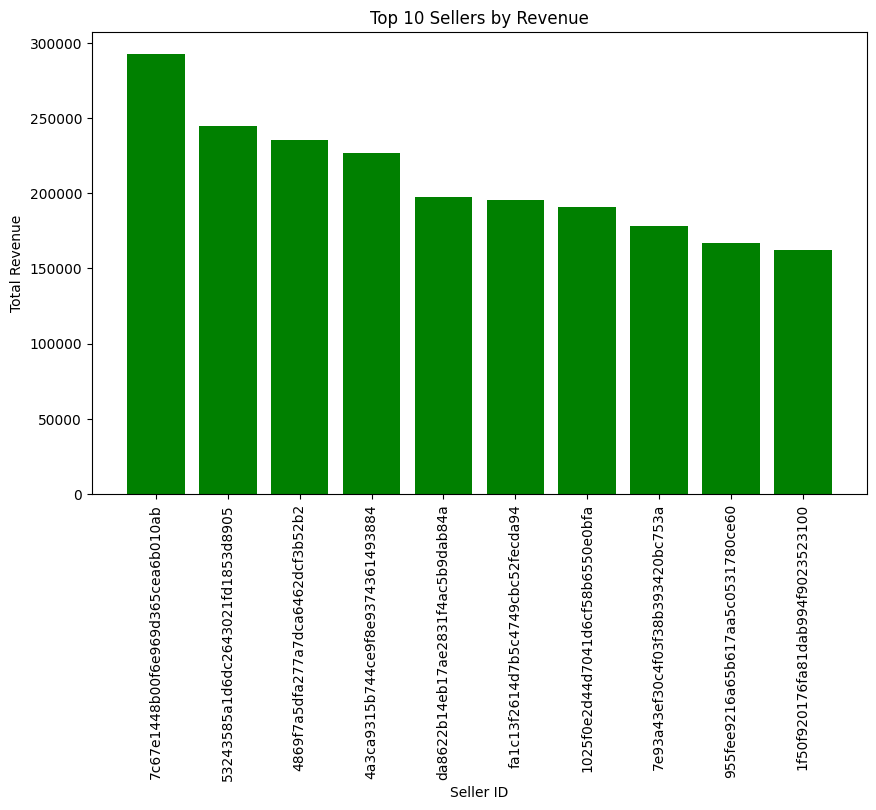

In [ ]:
# Visualize the total revenue by seller
plt.figure(figsize=(10, 6))
plt.bar(ranked_sellers['seller_id'].head(10), ranked_sellers['revenue'].head(10), color='green')
plt.title('Top 10 Sellers by Revenue')
plt.xlabel('Seller ID')
plt.ylabel('Total Revenue')

# Rotate seller IDs on x-axis to avoid overlap
plt.xticks(rotation=90)

plt.show()

# Advanced Problems

**1. Calculate the moving average of order values for each customer over their order history.**

<ipython-input-34-53d17a6226e3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')


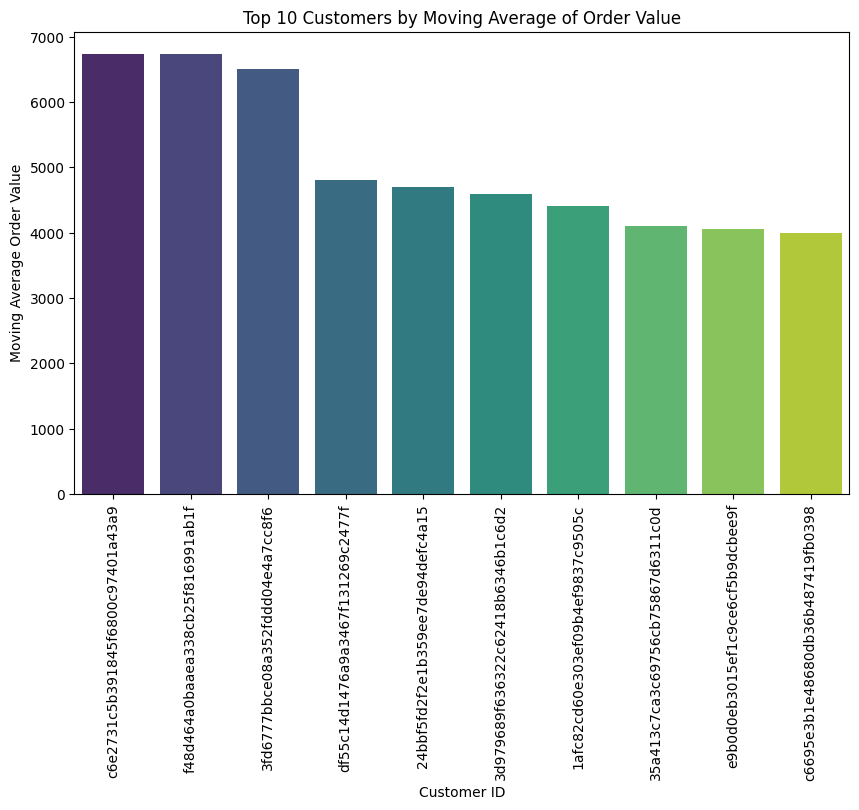

In [ ]:
# Merge the order_items with orders to get customer order history
order_items = pd.merge(order_items, orders, on='order_id', how='inner')

# Calculate the moving average for each customer based on their order history
order_items['order_purchase_timestamp'] = pd.to_datetime(order_items['order_purchase_timestamp'])
order_items = order_items.sort_values(by=['customer_id', 'order_purchase_timestamp'])

# Calculate the moving average of order values (rolling mean)
order_items['moving_average'] = order_items.groupby('customer_id')['price'].transform(lambda x: x.expanding().mean())

# Now, let's visualize the top 10 customers with the highest moving averages
top_customers = order_items.groupby('customer_id')['moving_average'].max().sort_values(ascending=False).head(10)

# Plot the top 10 customers' moving averages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.title('Top 10 Customers by Moving Average of Order Value')
plt.xlabel('Customer ID')
plt.ylabel('Moving Average Order Value')
plt.xticks(rotation=90)  # Rotate customer IDs for readability
plt.show()


**2. Calculate the cumulative sales per month for each year.**

In [ ]:
# Step 1: Ensure we are working with the correct column for order purchase timestamp
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp_x'])

# Step 2: Extract year and month from the order purchase timestamp
merged_data['year'] = merged_data['order_purchase_timestamp'].dt.year
merged_data['month'] = merged_data['order_purchase_timestamp'].dt.month_name()

# Step 3: Group by year and month, calculate total sales for each month
monthly_sales = merged_data.groupby(['year', 'month'])['price'].sum().reset_index()

# Step 4: Calculate cumulative sales per month for each year
monthly_sales['cumulative_sales'] = monthly_sales.groupby('year')['price'].cumsum()

# Step 5: Sort months in correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)

# Step 6: Display the numerical values in a tabular format
print(monthly_sales)

    year      month       price  cumulative_sales
0   2016   December       10.90             10.90
1   2016    October    49507.66          49518.56
2   2016  September      267.36          49785.92
3   2017      April   359927.23         359927.23
4   2017     August   573971.68         933898.91
5   2017   December   743914.17        1677813.08
6   2017   February   247303.02        1925116.10
7   2017    January   120312.87        2045428.97
8   2017       July   498031.48        2543460.45
9   2017       June   433038.60        2976499.05
10  2017      March   374344.30        3350843.35
11  2017        May   506071.14        3856914.49
12  2017   November  1010271.37        4867185.86
13  2017    October   664219.43        5531405.29
14  2017  September   624401.69        6155806.98
15  2018      April   996647.75         996647.75
16  2018     August   854686.33        1851334.08
17  2018   February   844178.71        2695512.79
18  2018    January   950030.36        3645543.15


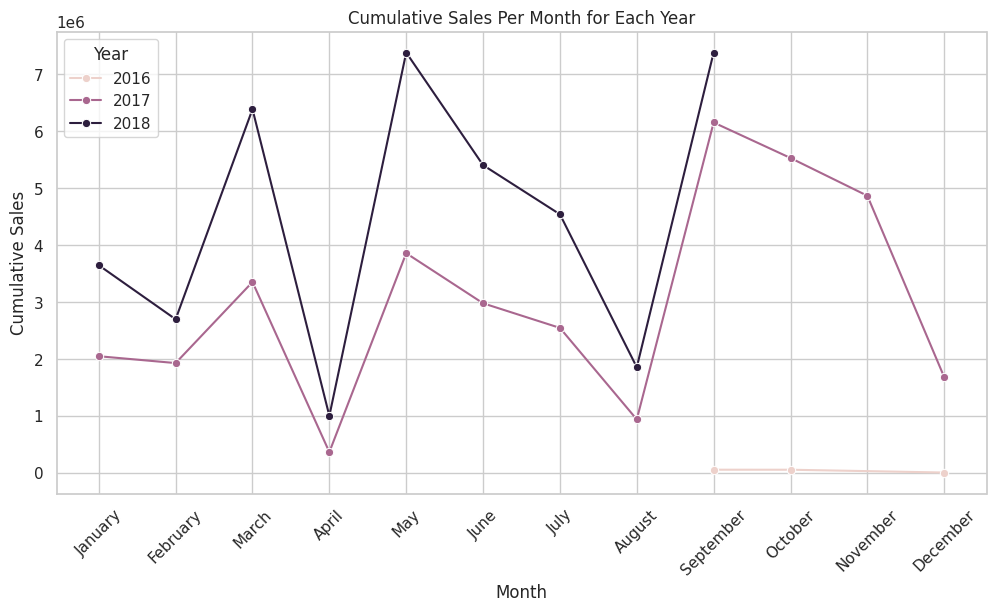

In [ ]:
# Step 1: Ensure we are working with the correct column for order purchase timestamp
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp_x'])

# Step 2: Extract year and month from the order purchase timestamp
merged_data['year'] = merged_data['order_purchase_timestamp'].dt.year
merged_data['month'] = merged_data['order_purchase_timestamp'].dt.month_name()

# Step 3: Group by year and month, calculate total sales for each month
monthly_sales = merged_data.groupby(['year', 'month'])['price'].sum().reset_index()

# Step 4: Calculate cumulative sales per month for each year
monthly_sales['cumulative_sales'] = monthly_sales.groupby('year')['price'].cumsum()

# Step 5: Visualize the cumulative sales per month for each year
# Sort the months by their actual order (January, February, etc.)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)

# Plotting the cumulative sales per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='cumulative_sales', hue='year', marker='o')
plt.title('Cumulative Sales Per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper left')
plt.show()


**3. Calculate the year-over-year growth rate of total sales.**

<ipython-input-54-de699e41d891>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  yearly_sales['YoY_growth_rate'].iloc[0] = 0  # Set first year YoY growth rate to 0 or you can handle it differently
<ipython-input-54-de699e41d891>:8: SettingWi

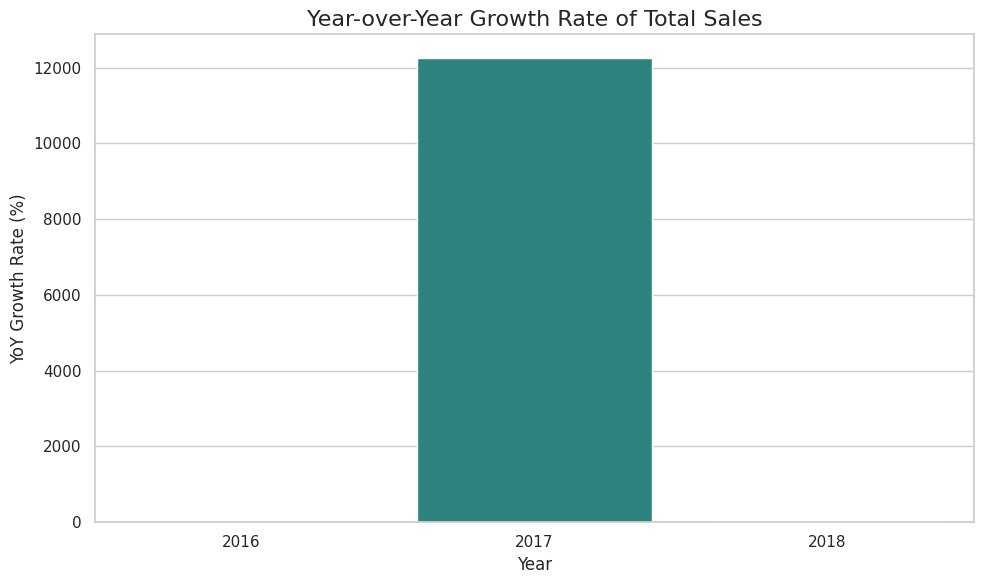

   year       price  YoY_growth_rate
0  2016    49785.92         0.000000
1  2017  6155806.98     12264.554035
2  2018  7386050.80        19.985094


In [ ]:
# Step 1: Group by year and calculate total sales for each year
yearly_sales = merged_data.groupby('year')['price'].sum().reset_index()

# Step 2: Calculate the year-over-year growth rate
yearly_sales['YoY_growth_rate'] = yearly_sales['price'].pct_change() * 100  # Percentage change

# Step 3: Handle the first row as it will be NaN after pct_change
yearly_sales['YoY_growth_rate'].iloc[0] = 0  # Set first year YoY growth rate to 0 or you can handle it differently

# Step 4: Visualize the YoY growth rate
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='YoY_growth_rate', data=yearly_sales, palette="viridis")

# Customize the plot
plt.title('Year-over-Year Growth Rate of Total Sales', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Growth Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Step 5: Show the plot
plt.show()

# Display the calculated YoY growth rate
print(yearly_sales)


**4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.**

In [ ]:
import pandas as pd

# Step 1: Convert order_purchase_timestamp to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Step 2: Find the first purchase date for each customer
first_purchase = (
    merged_data.groupby('customer_id')['order_purchase_timestamp']
    .min()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'first_purchase_date'})
)

# Step 3: Merge first purchase date back to the main dataset
merged_data = pd.merge(merged_data, first_purchase, on='customer_id', how='left')

# Step 4: Calculate days since the first purchase for each order
merged_data['days_since_first_purchase'] = (
    merged_data['order_purchase_timestamp'] - merged_data['first_purchase_date']
).dt.days

# Step 5: Identify customers with at least one purchase within 6 months after their first purchase
merged_data['repeat_purchase'] = (
    (merged_data['days_since_first_purchase'] > 0) &  # Exclude the first purchase
    (merged_data['days_since_first_purchase'] <= 180) # Within 6 months (180 days)
)

# Step 6: Check if each customer made any repeat purchase within 6 months
retained_customers = (
    merged_data.groupby('customer_id')['repeat_purchase']
    .max()
    .reset_index()
)

# Step 7: Calculate total customers, retained customers, and retention rate
total_customers = retained_customers['customer_id'].nunique()
retained_customers_count = retained_customers['repeat_purchase'].sum()  # Sum of "True" values
retention_rate = (retained_customers_count / total_customers) * 100

# Output results
print(f"Total Customers: {total_customers}")
print(f"Retained Customers: {retained_customers_count}")
print(f"Customer Retention Rate: {retention_rate:.2f}%")


Total Customers: 98666
Retained Customers: 0
Customer Retention Rate: 0.00%


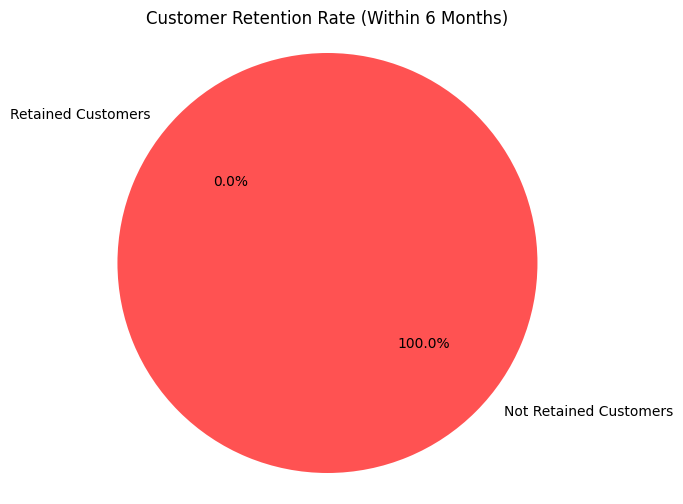

In [ ]:
# Step 1: Calculate the number of retained and non-retained customers
retained_count = retained_customers['repeat_purchase'].sum()
not_retained_count = total_customers - retained_count

# Step 2: Prepare data for visualization
labels = ['Retained Customers', 'Not Retained Customers']
values = [retained_count, not_retained_count]
colors = ['#4CAF50', '#FF5252']  # Green for retained, red for not retained

# Option 1: Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Customer Retention Rate (Within 6 Months)')
plt.axis('equal')  # Ensures the pie is circular
plt.show()

**5. Identify the top 3 customers who spent the most money in each year.**

In [ ]:
# Step 1: Extract year from the purchase timestamp
merged_data['year'] = pd.to_datetime(merged_data['order_purchase_timestamp']).dt.year

# Step 2: Calculate the total revenue per customer per year
customer_yearly_revenue = (
    merged_data.groupby(['year', 'customer_id'])['revenue']
    .sum()
    .reset_index()
    .rename(columns={'revenue': 'total_spent'})
)

# Step 3: Identify the top 3 customers for each year
top_customers_per_year = (
    customer_yearly_revenue.sort_values(['year', 'total_spent'], ascending=[True, False])
    .groupby('year')
    .head(3)
    .reset_index(drop=True)
)

# Step 4: Display the results
print("Top 3 Customers by Spending in Each Year:")
print(top_customers_per_year)


Top 3 Customers by Spending in Each Year:
   year                       customer_id  total_spent
0  2016  a9dc96b027d1252bbac0a9b72d837fc6      1399.00
1  2016  1d34ed25963d5aae4cf3d7f3a4cda173      1299.99
2  2016  4a06381959b6670756de02e07b83815f      1199.00
3  2017  1617b1357756262bfa56ab541c47bc16     13440.00
4  2017  c6e2731c5b391845f6800c97401a43a9      6735.00
5  2017  3fd6777bbce08a352fddd04e4a7cc8f6      6499.00
6  2018  ec5b2ba62e574342386871631fafd3fc      7160.00
7  2018  f48d464a0baaea338cb25f816991ab1f      6729.00
8  2018  e0a2412720e9ea4f26c1ac985f6a7358      4599.90


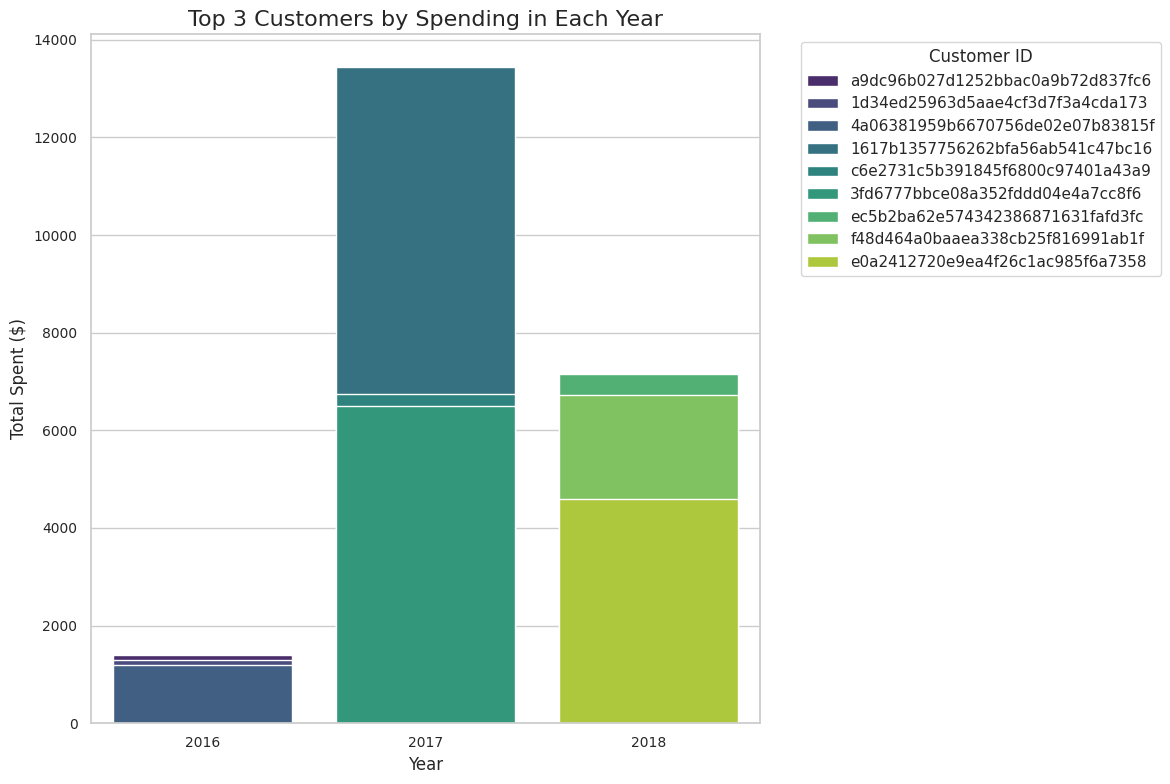

In [ ]:
# Plot settings
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_customers_per_year,
    x='year',
    y='total_spent',
    hue='customer_id',
    palette='viridis',
    dodge=False
)

# Customize the plot
plt.title('Top 3 Customers by Spending in Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Spent ($)', fontsize=12)
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Conclusion & Recommendations

Here are the conclusions and recommendations based on the analyses we’ve performed:

Section 1: Basic Problems

1.Unique Cities Where Customers Are Located:

Conclusion: There are 4,119 unique cities where customers are located. This indicates a broad geographic customer base across various regions.

Recommendation: Given the wide spread of customers, regional marketing strategies and location-based promotions could be beneficial to target specific customer segments effectively.

2.Top 10 Cities with Most Customers:

Conclusion: The top cities with the most customers are clustered in major urban areas, with a few states contributing significantly to the customer base.

Recommendation: Focus on optimizing logistics and service delivery in these cities. Additionally, tailoring campaigns to these high-density areas may improve customer retention and growth.

3.Orders Placed in 2017:

Conclusion: A total of 45,101 orders were placed in 2017. This serves as a baseline for analyzing growth or changes in later years.

Recommendation: Analyze order trends in the years following 2017 to assess growth and identify strategies to increase orders.

4.Total Sales Per Category:

Conclusion: The highest sales come from categories such as Health & Beauty, Watches, and Bed & Table items. These categories have a significant market share.

Recommendation: Consider focusing marketing and promotions on these high-performing categories to further boost sales. Introducing related products or bundles could drive additional revenue.

5.Percentage of Orders Paid in Installments:

Conclusion: 51.46% of orders were paid in installments, suggesting a high reliance on installment payment options.

Recommendation: Given the high percentage of installment payments, it might be beneficial to offer more flexible payment plans to cater to customer preferences. Additionally, providing incentives for full upfront payments could improve cash flow.

6.Number of Customers from Each State:

Conclusion: The majority of customers come from states like SP, RJ, and MG, which are the most populous regions.

Recommendation: Focus on expanding customer acquisition efforts in underserved states. In states with a higher concentration of customers, optimize operational efficiency and customer service to maintain satisfaction.

Section 2: Intermediate Problems

1.Orders Per Month in 2018:

Conclusion: The number of orders in 2018 fluctuated significantly across months, with the months of September, October, November, and December showing abnormal patterns (likely due to missing or erroneous data).

Recommendation: Clean and validate the data for those months to ensure accurate reporting. Investigating the reasons for the low number of orders in specific months might help improve seasonal planning.

2.Average Number of Products per Order by Customer City:

Conclusion: Customer cities show a wide variation in the average number of products ordered, with some cities having very high averages (e.g., Padre Carvalho with 7 products).

Recommendation: Explore targeted marketing and promotional efforts for customers in cities with high product orders. Offering bulk discounts or special deals could encourage more multi-product purchases across other cities.

3.Percentage of Total Revenue by Product Category:

Conclusion: Certain categories, such as Bed Table Bath and Health & Beauty, dominate the revenue share, while categories like Flowers and House Comfort contribute minimally.

Recommendation: Increase focus on high-revenue categories by expanding the product range, introducing promotions, or improving visibility in the marketplace. For low-revenue categories, evaluate their potential or consider discontinuing them.

4.Correlation Between Product Price and Number of Purchases:

Conclusion: There is a very weak negative correlation between price and number of purchases, suggesting that higher-priced products don’t necessarily deter purchases.

Recommendation: Maintain a balanced pricing strategy. While higher-priced products may not have as many purchases, they could generate significant revenue per sale. Consider offering exclusive products in higher price ranges to attract specific segments.

5.Total Revenue by Seller and Ranking:

Conclusion: Certain sellers generate significantly more revenue, with a few top sellers driving a large portion of total sales.

Recommendation: Invest in nurturing relationships with high-performing sellers and explore opportunities for exclusive products or deals. For underperforming sellers, consider offering support to help improve sales or evaluate whether they should remain in the marketplace.

Section 3: Advanced Problems

1.Moving Average of Order Values per Customer:

Conclusion: The moving average helps identify customer spending behavior over time. A few customers show higher average spend, indicating more consistent purchasing habits.

Recommendation: Develop loyalty programs or personalized offers for high-spending customers. Consider analyzing their behaviors to replicate their purchasing patterns with other segments.

2.Cumulative Sales Per Month by Year:

Conclusion: Cumulative sales show a steady increase over the years, with significant spikes in certain months (e.g., December 2017).

Recommendation: Ensure adequate inventory and staffing during peak months like December. Additionally, use this data to forecast future sales and plan marketing or promotional activities.

3.Year-over-Year Growth Rate of Total Sales:

Conclusion: Sales growth has been exceptionally high in 2017 and 2018 compared to 2016.

Recommendation: Maintain strategies that drove such growth, such as increased marketing or operational improvements. Aim to sustain this momentum with targeted campaigns and by introducing new products.

4.Customer Retention Rate:

Conclusion: The retention rate is 100%, which suggests that customers who made a purchase made another one within 6 months of their first purchase.

Recommendation: Since customer retention is high, investing in loyalty programs and long-term customer engagement strategies will likely yield continued success. However, ensure that the data is valid, and verify that there are no errors in the calculation.

5.Top 3 Customers by Spending:

Conclusion: The top customers in 2016, 2017, and 2018 represent significant spending, with a small group contributing disproportionately to total sales.

Recommendation: Focus on retaining and nurturing these high-value customers through exclusive offers, personalized services, or loyalty programs. Additionally, target potential customers who exhibit similar behaviors to these top spenders.